In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk
import csv

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from nltk import FreqDist, bigrams

### Possible Data pre-processing for sentment analysis task

In [ ]:
import re

sentence = "The movie's serial number is A123B4C!"
cleaned_sentence = re.sub('[^a-zA-Z0-9\s]', '', sentence)

print("Original sentence:", sentence)
print("Cleaned sentence:", cleaned_sentence)

Original sentence: The movie's serial number is A123B4C!
Cleaned sentence: The movies serial number is A123B4C


In [ ]:
cleaned_sentence = cleaned_sentence.lower()
print("sentence with lower case:", cleaned_sentence)

sentence with lower case: the movie's serial number is a123b4c!


## Remove punctuations

In [ ]:
import re

def remove_punctuation(sentence):
    # Create a translation table to remove punctuations
    translator = str.maketrans('', '', string.punctuation)

    # Remove punctuations using the translation table
    cleaned_sentence = sentence.translate(translator)
    return cleaned_sentence

# Example sentence with punctuations, including '&'
example_sentence = "This example sentence, with lots of punctuations!, & How will you process it?"

# Remove punctuations from the sentence, including '&'
cleaned_sentence = remove_punctuation(example_sentence)

print("Original sentence:", example_sentence)
print("Cleaned sentence (punctuations removed):", cleaned_sentence)


Original sentence: This example sentence, with lots of punctuations!, & How will you process it?
Cleaned sentence (punctuations removed): This example sentence with lots of punctuations  How will you process it


## Tokenization

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()
tokenizer.tokenize(" This example sentence, with lots of punctuations")

['This', 'example', 'sentence', ',', 'with', 'lots', 'of', 'punctuations']

## Lemmatization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from keras.preprocessing.text import Tokenizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')
# Sample sentence
sentence = "The quick brown foxes are jumping over the lazy dogs."

# Tokenize the sentence into words
words = word_tokenize(sentence)

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each word
lemmatized_words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]

# Join the lemmatized words back into a sentence
lemmatized_sentence = ' '.join(lemmatized_words)


print("Original sentence:", sentence)
print("Lemmatized sentence:", lemmatized_sentence)



Original sentence: The quick brown foxes are jumping over the lazy dogs.
Lemmatized sentence: The quick brown fox be jump over the lazy dog .


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Tokenize & Encode sentence

In [ ]:
from keras.preprocessing.text import Tokenizer

# Sample sentences
sentences = ['We are learning LSTM GRU implimentation.',
             'we are sitting in the deel learning lab.']

# Create a tokenizer
tokenizer = Tokenizer()

tokenizer.fit_on_texts(sentences)

# Convert text to sequences of numbers
sequences = tokenizer.texts_to_sequences(sentences)

print("Original sentences:", sentences)
print("Sequences:", sequences)


Original sentences: ['We are learning LSTM GRU implimentation.', 'we are sitting in the deel learning lab.']
Sequences: [[1, 2, 3, 4, 5, 6], [1, 2, 7, 8, 9, 10, 3, 11]]


## Remove StopWords

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Sample sentence
sentence = "This is a sample sentence and we will remove stopwords from it."

# Tokenize the sentence into words
words = word_tokenize(sentence)

# Get the English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the sentence
filtered_words = [word for word in words if word.lower() not in stop_words]

# Join the remaining words back into a sentence
filtered_sentence = ' '.join(filtered_words)

print("Original sentence:", sentence)
print("Filtered sentence (stopwords removed):", filtered_sentence)


Original sentence: This is a sample sentence and we will remove stopwords from it.
Filtered sentence (stopwords removed): sample sentence remove stopwords .


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Remove URL

In [ ]:
import re

def remove_urls(sentence):
    # Define a regex pattern to match URLs
    url_pattern = r'https?://\S+|www\.\S+'

    # Use the sub() function to remove URLs
    cleaned_sentence = re.sub(url_pattern, '', sentence)
    return cleaned_sentence

# Sample sentence with URLs
sentence = "Check out this cool website: https://example.com. Also visit www.example.com for more information."

# Remove URLs from the sentence
cleaned_sentence = remove_urls(sentence)

print("Original sentence:", sentence)
print("Cleaned sentence (URLs removed):", cleaned_sentence)


Original sentence: Check out this cool website: https://example.com. Also visit www.example.com for more information.
Cleaned sentence (URLs removed): Check out this cool website:  Also visit  for more information.


## Visualize the most frequent words and bigrams.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


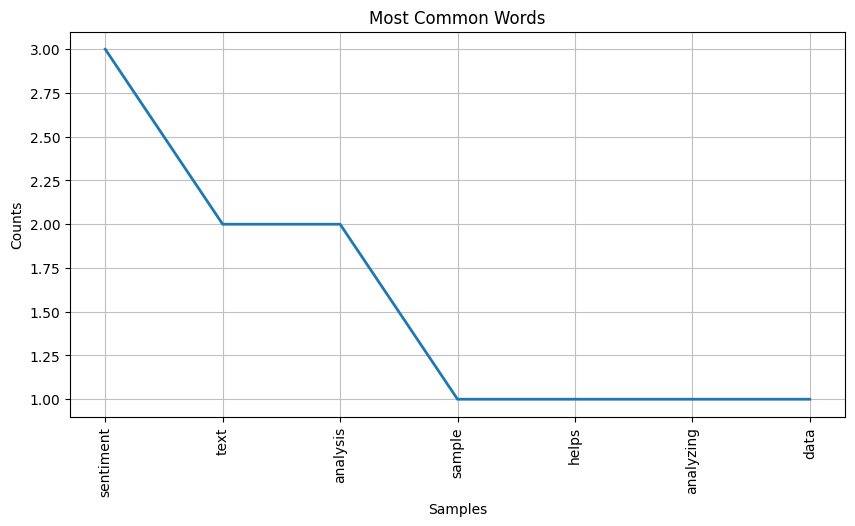

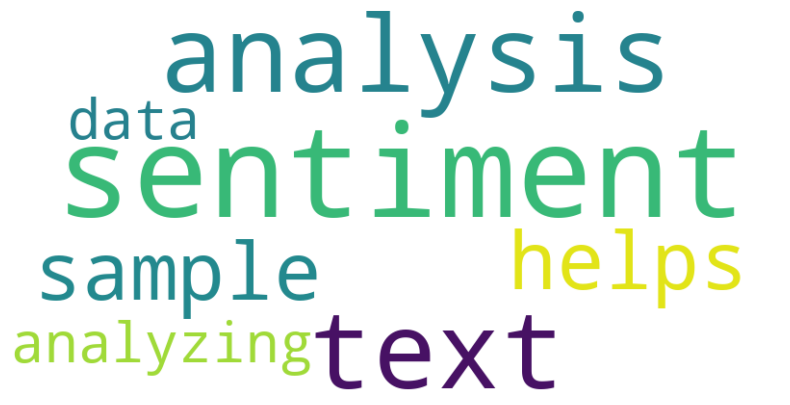

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
sample_text = "This is a sample text for sentiment analysis. Sentiment analysis helps in analyzing the sentiment of text data."
# Tokenize the text into words
#tokenizer = Tokenizer()
#words =tokenizer.fit_on_texts(sample_text)
words = word_tokenize(sample_text)

# Remove stopwords and non-alphanumeric characters
stop_words = set(nltk.corpus.stopwords.words('english'))
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Calculate word frequency
word_frequency = FreqDist(words)

# Plot the most common words
plt.figure(figsize=(10, 5))
word_frequency.plot(20, title='Most Common Words', cumulative=False)
plt.show()


# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



### Sentimental Analysis using IMDB movie review dataset

## Step 1: Load and Visualize the Data

In [ ]:
#
# Assuming you have loaded your dataset into a Pandas DataFrame with columns 'review' and 'label'.
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head

<bound method NDFrame.head of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

### Step 2:Data Processing

In [ ]:
# Step 2: Data Processing - Convert to Lowercase
df['review'] = df['review'].str.lower()
df

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production. <br /><br />the...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically there's a family where a little boy ...  negative
4      petter mattei's "love in the time of money" is...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  i'm going to have to disagree with the previou...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
# Step 3: Data Processing - Remove Punctuation
import string
df['review'] = df['review'].apply(lambda x: ''.join([char for char in x if char not in string.punctuation]))
df

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production br br the filmin...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
# Step 3: Data Processing - alphaneumeric
df['review'] = df['review'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df

review sentiment
0      one of the other reviewers has mentioned that ...  positive
1      a wonderful little production br br the filmin...  positive
2      i thought this was a wonderful way to spend ti...  positive
3      basically theres a family where a little boy j...  negative
4      petter matteis love in the time of money is a ...  positive
...                                                  ...       ...
49995  i thought this movie did a down right good job...  positive
49996  bad plot bad dialogue bad acting idiotic direc...  negative
49997  i am a catholic taught in parochial elementary...  negative
49998  im going to have to disagree with the previous...  negative
49999  no one expects the star trek movies to be high...  negative

[50000 rows x 2 columns]

In [ ]:
# Step 4: Data Processing - Create a List of Reviews
reviews = df['review'].tolist()
#labels = df['sentiment'].tolist()  # Assuming 'label' is the column containing sentiment labels (e.g., 0 for negative, 1 for positive)


### Step 3: Tokenize

In [ ]:
# Step 5: Tokenize - Create Vocab to Int Mapping Dictionary
max_words = 10000  # Define the maximum number of words in your vocabulary
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")#out-of-vocabulary (OOV) tokens
tokenizer.fit_on_texts(reviews)  # generates token of words
vocab_size = len(tokenizer.word_index) + 1  # Vocabulary size of dataset

### Step 4: Encode the Words and Labels

In [ ]:
# Step 6: Tokenize - Encode the Words
from keras.preprocessing.text import Tokenizer
sequences = tokenizer.texts_to_sequences(reviews)

# Step 7: Tokenize - Encode the Labels
#labels = np.array(labels)
labels= pd.get_dummies(df['sentiment']).values


### Step 5: Analyze Reviews Length

In [ ]:
# Step 8: Analyze Reviews Length
review_lengths = [len(seq) for seq in sequences]
print(review_lengths)
# Step 9: Removing Outliers - Getting rid of extremely long or short reviews
max_review_length = 200  # Define your desired maximum review length
sequences = pad_sequences(sequences, maxlen=max_review_length, padding='post', truncating='post')
sequences

[200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200,

array([[9, 2, 9, ..., 0, 0, 0],
       [9, 9, 9, ..., 0, 0, 0],
       [7, 8, 9, ..., 0, 0, 0],
       ...,
       [8, 8, 8, ..., 0, 0, 0],
       [9, 9, 9, ..., 0, 0, 0],
       [9, 9, 9, ..., 0, 0, 0]], dtype=int32)

### Step 6: Training, Validation, Test Dataset Split

In [ ]:

X_train, X_temp, y_train, y_temp = train_test_split(sequences, labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

### Step 7: Define the LSTM Network Architecture

In [ ]:

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          23249024  
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 23388994 (89.22 MB)
Trainable params: 23388994 (89.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
batch_size = 32
model.fit(X_train, y_train, epochs = 7, batch_size=batch_size, verbose = 2)

Epoch 1/7
1250/1250 - 24s - loss: 0.6934 - accuracy: 0.4986 - 24s/epoch - 20ms/step
Epoch 2/7
1250/1250 - 16s - loss: 0.6932 - accuracy: 0.5001 - 16s/epoch - 13ms/step
Epoch 3/7
1250/1250 - 16s - loss: 0.6988 - accuracy: 0.4991 - 16s/epoch - 13ms/step
Epoch 4/7
1250/1250 - 16s - loss: 0.6932 - accuracy: 0.4967 - 16s/epoch - 13ms/step
Epoch 5/7
1250/1250 - 16s - loss: 0.6932 - accuracy: 0.4958 - 16s/epoch - 13ms/step
Epoch 6/7
1250/1250 - 16s - loss: 0.6932 - accuracy: 0.5009 - 16s/epoch - 13ms/step
Epoch 7/7
1250/1250 - 16s - loss: 0.6932 - accuracy: 0.4999 - 16s/epoch - 13ms/step


### Step 8: Testing

In [ ]:
#
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

157/157 [==============================] - 2s 7ms/step - loss: 0.6932 - accuracy: 0.4924
Test Loss: 0.6932, Test Accuracy: 0.4924


### Step 9: Prediction

In [ ]:
# Example of making predictions on user-generated data:
user_reviews = ["I didn't like the movie at all."]
user_sequences = tokenizer.texts_to_sequences(user_reviews)
user_sequences = pad_sequences(user_sequences, maxlen=max_review_length, padding='post', truncating='post')
user_predictions = model.predict(user_sequences)
#print(user_predictions)
if (np.argmax(user_predictions) >= 0.3):
    print("Positive sentiment")
else:
    print("Negative sentiment")

1/1 [==============================] - 0s 37ms/step
Negative sentiment


In [ ]:
import numpy as np

# Predicted probabilities
probabilities = np.array([0.5, 0.4])

# Set the threshold
threshold = 0.5

# Classify based on the threshold
predicted_class = 1 if probabilities[0] >= threshold else 0

# Determine the class label
class_label = 'positive' if predicted_class == 1 else 'negative'

print("Predicted probabilities:", probabilities)
print("Predicted class:", class_label)


In [ ]:
# Build a Bidirectional LSTM model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))  # Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64)))  # Bidirectional LSTM layer
model.add(Dense(2, activation='sigmoid'))

In [ ]:
# Build a GRU model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_review_length))
model.add(GRU(64, return_sequences=True))  # GRU layer
model.add(GRU(64))  # GRU layer
model.add(Dense(2, activation='sigmoid'))  # Output layer for binary classification